# __(EDA)__  Exploratory Data Analysis
This notebook performs an exploratory data analysis (EDA) on happiness datasets from __2015__ to __2019__, focusing on data cleaning, visualization, statistical analysis, and dimensionality reduction to understand patterns and trends in global happiness scores.

### Enviroment

In [1]:
import os
import pandas as pd
import logging
import matplotlib.pyplot as plt
import numpy as np
import difflib
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [2]:
print("Current directory before change:", os.getcwd())

try:
    
    os.chdir("../")
    print("Current directory after change:", os.getcwd())

except FileNotFoundError:
    print("""
        FileNotFoundError - The specified directory does not exist or you are already in the root.
        If the code already worked once, do not run it again.
    """)

Current directory before change: c:\Users\Administrador\Desktop\workshop_03_kafka\notebooks
Current directory after change: c:\Users\Administrador\Desktop\workshop_03_kafka


## Preview of CSV Files

### 2015.csv

In [3]:
df_2015 = pd.read_csv('data/2015.csv')
logger.info(f'2015.csv shape: {df_2015.shape}')
df_2015.head(5)
df_2015.info()

INFO:__main__:2015.csv shape: (158, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### 2016.csv

In [4]:
df_2016 = pd.read_csv('data/2016.csv')
logger.info(f'2016.csv shape: {df_2016.shape}')
df_2016.info()

INFO:__main__:2016.csv shape: (157, 13)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

### 2017.csv

In [5]:
df_2017 = pd.read_csv('data/2017.csv')
logger.info(f'2017.csv shape: {df_2017.shape}')
df_2017.info()

INFO:__main__:2017.csv shape: (155, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

### 2018.csv

In [6]:
df_2018 = pd.read_csv('data/2018.csv')
logger.info(f'2018.csv shape: {df_2018.shape}')
df_2018.info()

INFO:__main__:2018.csv shape: (156, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


### 2019.csv

In [7]:
df_2019 = pd.read_csv('data/2019.csv')
logger.info(f'2019.csv shape: {df_2019.shape}')
df_2019.info()

INFO:__main__:2019.csv shape: (156, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019]     

for i, df in enumerate(dfs, start=2015):
    print(f"----- Head de {i}.csv -----")
    display(df.head())

----- Head de 2015.csv -----


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


----- Head de 2016.csv -----


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


----- Head de 2017.csv -----


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


----- Head de 2018.csv -----


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


----- Head de 2019.csv -----


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### List All Columns and Suggest Similar Names

In this step, we collect all unique column names from the 2015–2019 DataFrames, log the total count, and use fuzzy matching to surface any similar names. This helps catch typos or inconsistencies before merging the datasets.

**What it does:**
- Combines column lists from each year into one set  
- Logs the total number of unique columns  
- For each column, suggests up to three close matches (similarity ≥ 0.8)

In [9]:
dfs = {
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018,
    '2019': df_2019
}

all_cols = set().union(*(set(df.columns) for df in dfs.values()))
logger.info(f'Total unique columns found: {len(all_cols)}')

for col in sorted(all_cols):
    candidates = difflib.get_close_matches(col, all_cols - {col}, n=3, cutoff=0.8)
    if candidates:
        logger.info(f'{col} → {candidates}')


INFO:__main__:Total unique columns found: 30
INFO:__main__:Dystopia Residual → ['Dystopia.Residual']
INFO:__main__:Dystopia.Residual → ['Dystopia Residual']
INFO:__main__:Happiness Rank → ['Happiness.Rank']
INFO:__main__:Happiness Score → ['Happiness.Score']
INFO:__main__:Happiness.Rank → ['Happiness Rank']
INFO:__main__:Happiness.Score → ['Happiness Score']
INFO:__main__:Health (Life Expectancy) → ['Healthy life expectancy', 'Health..Life.Expectancy.']
INFO:__main__:Health..Life.Expectancy. → ['Health (Life Expectancy)']
INFO:__main__:Healthy life expectancy → ['Health (Life Expectancy)']
INFO:__main__:Lower Confidence Interval → ['Upper Confidence Interval']
INFO:__main__:Trust (Government Corruption) → ['Trust..Government.Corruption.']
INFO:__main__:Trust..Government.Corruption. → ['Trust (Government Corruption)']
INFO:__main__:Upper Confidence Interval → ['Lower Confidence Interval']


### Rename and Standardize Columns

This step applies a predefined mapping to harmonize column names across all yearly DataFrames (2015–2019). By renaming variants (e.g., “Happiness.Score” → `happiness_score`), we ensure consistency for downstream analysis.

**Key actions:**
- Define `column_mapping` dict linking all known variants to a single standard name  
- Iterate over each year’s DataFrame and apply `df.rename(...)` in place  
- Log completion per year


In [10]:
column_mapping = {
    'Country': 'country',
    'Country or region': 'country',
    
    'Happiness Rank': 'happiness_rank',
    'Happiness.Rank': 'happiness_rank',
    'Overall rank': 'happiness_rank',
    
    'Happiness Score': 'happiness_score',
    'Happiness.Score': 'happiness_score',
    'Score': 'happiness_score',
    
    'Lower Confidence Interval': 'lower_confidence_interval',
    'Whisker.low': 'lower_confidence_interval',
    'Upper Confidence Interval': 'upper_confidence_interval',
    'Whisker.high': 'upper_confidence_interval',
   
    'Economy (GDP per Capita)': 'gdp_per_capita',
    'Economy..GDP.per.Capita.': 'gdp_per_capita',
    'GDP per capita': 'gdp_per_capita',
    
    'Family': 'social_support',
    'Social support': 'social_support',
   
    'Health (Life Expectancy)': 'healthy_life_expectancy',
    'Health..Life.Expectancy.': 'healthy_life_expectancy',
    'Healthy life expectancy': 'healthy_life_expectancy',
    
    'Freedom': 'freedom',
    'Freedom to make life choices': 'freedom',
   
    'Generosity': 'generosity',
   
    'Trust (Government Corruption)': 'trust_government_corruption',
    'Trust..Government.Corruption.': 'trust_government_corruption',
    'Perceptions of corruption': 'trust_government_corruption',
    
    'Dystopia Residual': 'dystopia_residual',
    'Dystopia.Residual': 'dystopia_residual',
    'Region': 'region'
}

for year, df in dfs.items():
    df.rename(columns=column_mapping, inplace=True)
    logger.info(f'{year}: renamed columns')


INFO:__main__:2015: renamed columns
INFO:__main__:2016: renamed columns
INFO:__main__:2017: renamed columns
INFO:__main__:2018: renamed columns
INFO:__main__:2019: renamed columns


---
### Combine Yearly DataFrames into a Single Table

This step unifies all renamed DataFrames (2015–2019) into one consolidated DataFrame, ensuring every year has the same columns plus a `year` field.

**What it does:**
- Computes the sorted union of all columns and adds `'year'`  
- Reindexes each yearly DataFrame to that full column set  
- Assigns a `year` value to each row  
- Concatenates them into `combined_df` with a continuous index  
- Logs the final shape and column list

**Conclusion:**  
The resulting `combined_df` has consistent columns across years and includes a `year` column for time-based analyses. It’s now ready for exploratory data analysis and visualization.  


In [ ]:
union_cols = sorted({col for df in dfs.values() for col in df.columns} | {'year'})

combined_df = pd.concat(
    (
        df.reindex(columns=union_cols)
          .assign(year=int(year))
        for year, df in dfs.items()
    ),
    ignore_index=True
)

logger.info(f'Combined DataFrame shape: {combined_df.shape}')
logger.info(f'Columns now include: {combined_df.columns.tolist()}')

INFO:__main__:Combined DataFrame shape: (782, 15)
INFO:__main__:Columns now include: ['Standard Error', 'country', 'dystopia_residual', 'freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'happiness_score', 'healthy_life_expectancy', 'lower_confidence_interval', 'region', 'social_support', 'trust_government_corruption', 'upper_confidence_interval', 'year']


## Verification of Combined DataFrame


In [ ]:
logger.info(f'Columns in combined_df: {combined_df.columns.tolist()}')
logger.info(f'Number of rows: {combined_df.shape[0]}')

missing_counts = combined_df.isna().sum()
logger.info(f'Missing values per column:\n{missing_counts}')

non_null_pct = combined_df.notna().mean() * 100
logger.info(f'Non-null percentage per column:\n{non_null_pct}')

combined_df.head()

INFO:__main__:Columns in combined_df: ['Standard Error', 'country', 'dystopia_residual', 'freedom', 'gdp_per_capita', 'generosity', 'happiness_rank', 'happiness_score', 'healthy_life_expectancy', 'lower_confidence_interval', 'region', 'social_support', 'trust_government_corruption', 'upper_confidence_interval', 'year']
INFO:__main__:Number of rows: 782
INFO:__main__:Missing values per column:
Standard Error                 624
country                          0
dystopia_residual              312
freedom                          0
gdp_per_capita                   0
generosity                       0
happiness_rank                   0
happiness_score                  0
healthy_life_expectancy          0
lower_confidence_interval      470
region                         467
social_support                   0
trust_government_corruption      1
upper_confidence_interval      470
year                             0
dtype: int64
INFO:__main__:Non-null percentage per column:
Standard Error      

,Standard Error,country,dystopia_residual,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,healthy_life_expectancy,lower_confidence_interval,region,social_support,trust_government_corruption,upper_confidence_interval,year
0,0.03411,Switzerland,2.51738,0.66557,1.39651,0.29678,1,7.587,0.94143,NaN,Western Europe,1.34951,0.41978,NaN,2015
1,0.04884,Iceland,2.70201,0.62877,1.30232,0.43630,2,7.561,0.94784,NaN,Western Europe,1.40223,0.14145,NaN,2015
2,0.03328,Denmark,2.49204,0.64938,1.32548,0.34139,3,7.527,0.87464,NaN,Western Europe,1.36058,0.48357,NaN,2015
3,0.03880,Norway,2.46531,0.66973,1.45900,0.34699,4,7.522,0.88521,NaN,Western Europe,1.33095,0.36503,NaN,2015
4,0.03553,Canada,2.45176,0.63297,1.32629,0.45811,5,7.427,0.90563,NaN,North America,1.32261,0.32957,NaN,2015


### Drop Unnecessary Columns and Filter Missing Data

In this cleanup step, we remove less relevant columns and ensure all rows have a valid `trust_government_corruption` value.

**Actions performed:**
- **Drop columns**:  
  - `Standard Error`  
  - `dystopia_residual`  
  - `region`  
  - `lower_confidence_interval`  
  - `upper_confidence_interval`  
- **Filter rows**: Keep only entries where `trust_government_corruption` is not null.

**Conclusion:**  
By dropping unused metrics and removing rows with missing corruption-trust data, `combined_df` is leaner and ready for accurate analysis on core happiness factors.  


In [ ]:
cols_to_drop = [
    'Standard Error',
    'dystopia_residual',
    'region',
    'lower_confidence_interval',
    'upper_confidence_interval'
]
combined_df = combined_df.drop(columns=cols_to_drop)
logger.info(f'Dropped columns: {cols_to_drop}')

combined_df = combined_df[combined_df['trust_government_corruption'].notna()]
logger.info(f'New shape after dropping missing trust_government_corruption row: {combined_df.shape}')

INFO:__main__:Dropped columns: ['Standard Error', 'dystopia_residual', 'region', 'lower_confidence_interval', 'upper_confidence_interval']
INFO:__main__:New shape after dropping missing trust_government_corruption row: (781, 10)


# Exploratory Data Analysis (EDA) of the Combined DataFrame


### Vizualization of combined datafream 

In [14]:
combined_df.head()

,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,healthy_life_expectancy,social_support,trust_government_corruption,year
0,Switzerland,0.66557,1.39651,0.29678,1,7.587,0.94143,1.34951,0.41978,2015
1,Iceland,0.62877,1.30232,0.43630,2,7.561,0.94784,1.40223,0.14145,2015
2,Denmark,0.64938,1.32548,0.34139,3,7.527,0.87464,1.36058,0.48357,2015
3,Norway,0.66973,1.45900,0.34699,4,7.522,0.88521,1.33095,0.36503,2015
4,Canada,0.63297,1.32629,0.45811,5,7.427,0.90563,1.32261,0.32957,2015


### Verification of missing values per column


In [15]:
combined_df.isna().sum()

country                        0
freedom                        0
gdp_per_capita                 0
generosity                     0
happiness_rank                 0
happiness_score                0
healthy_life_expectancy        0
social_support                 0
trust_government_corruption    0
year                           0
dtype: int64

### DataFrame Structure Overview

This section displays the schema and non-null counts of `combined_df` after cleaning and merging. It confirms there are 781 rows and 10 columns, with one categorical (`object`) and nine numeric (`float64` and `int64`) fields.

```python
combined_df.info()


In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      781 non-null    object 
 1   freedom                      781 non-null    float64
 2   gdp_per_capita               781 non-null    float64
 3   generosity                   781 non-null    float64
 4   happiness_rank               781 non-null    int64  
 5   happiness_score              781 non-null    float64
 6   healthy_life_expectancy      781 non-null    float64
 7   social_support               781 non-null    float64
 8   trust_government_corruption  781 non-null    float64
 9   year                         781 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.1+ KB


__Conclusion:__
The DataFrame is complete with no missing values in the key metrics. You can proceed to statistical summaries or visualizations knowing the dataset is fully populated and correctly typed.

---

### Descriptive Statistics

This section presents summary statistics (count, mean, standard deviation, min/max, and quartiles) for the main numeric variables in `combined_df`. It helps you understand the central tendency, dispersion, and range before moving on to deeper analyses or visualizations.



In [17]:
desc = combined_df.describe().T
logger.info('Descriptive statistics calculated')
desc

INFO:__main__:Descriptive statistics calculated


,count,mean,std,min,25%,50%,75%,max
freedom,781.0,0.411254,0.152911,0.000,0.31048,0.431000,0.531000,0.724000
gdp_per_capita,781.0,0.914537,0.405403,0.000,0.60500,0.982000,1.233748,1.870766
generosity,781.0,0.218618,0.122394,0.000,0.13000,0.202000,0.279060,0.838075
happiness_rank,781.0,78.773367,45.162398,1.000,40.00000,79.000000,118.000000,158.000000
happiness_score,781.0,5.377232,1.127071,2.693,4.50900,5.321000,6.182000,7.769000
healthy_life_expectancy,781.0,0.612342,0.248459,0.000,0.44006,0.647239,0.808000,1.141000
social_support,781.0,1.078780,0.329581,0.000,0.87021,1.125000,1.328000,1.644000
trust_government_corruption,781.0,0.125436,0.105816,0.000,0.05400,0.091000,0.156030,0.551910
year,781.0,2016.992318,1.417814,2015.000,2016.00000,2017.000000,2018.000000,2019.000000


**Conclusion:**  
- Most metrics are fully populated (no missing values).  
- Variables like `freedom`, `gdp_per_capita`, and `healthy_life_expectancy` have wide ranges, indicating diversity across countries and years.  
- The median values (50%) for social support and generosity are lower than their means, suggesting right-skewed distributions.  
- `trust_government_corruption` has a low mean (0.125) with many countries reporting very low perceived corruption trust.  
- The `year` column confirms even distribution across the five years (2015–2019).  

### Histograms of Numerical Features


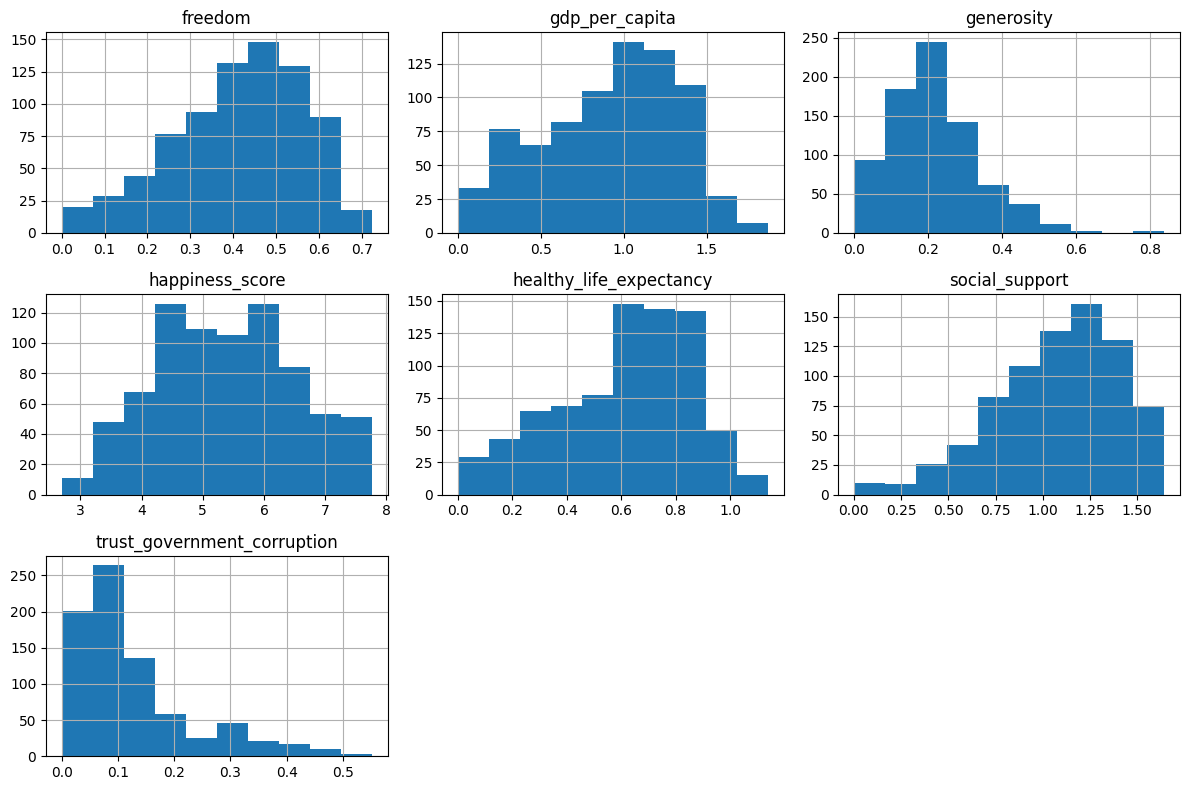

In [18]:
numeric = combined_df.select_dtypes(include='number').drop(columns=['happiness_rank', 'year'])
numeric.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

By visualizing histograms for the main numeric variables (excluding `happiness_rank` and `year`), we can quickly assess each feature’s distribution:

- **Skewness and shape**:  
  - **Freedom** and **happiness_score** appear roughly symmetric  
  - **GDP per capita**, **healthy_life_expectancy**, and **social_support** show right-skew, indicating a small number of high-value countries  
  - **Generosity** and **trust_government_corruption** are heavily right-skewed with many low values

- **Outliers and range**:  
  - Notable tails in GDP and trust suggest outlier detection or transformation may be needed  
  - Generosity has very few high-generosity outliers


### Correlation Matrix Analysis

The heatmap reveals how key well-being metrics relate to each other:


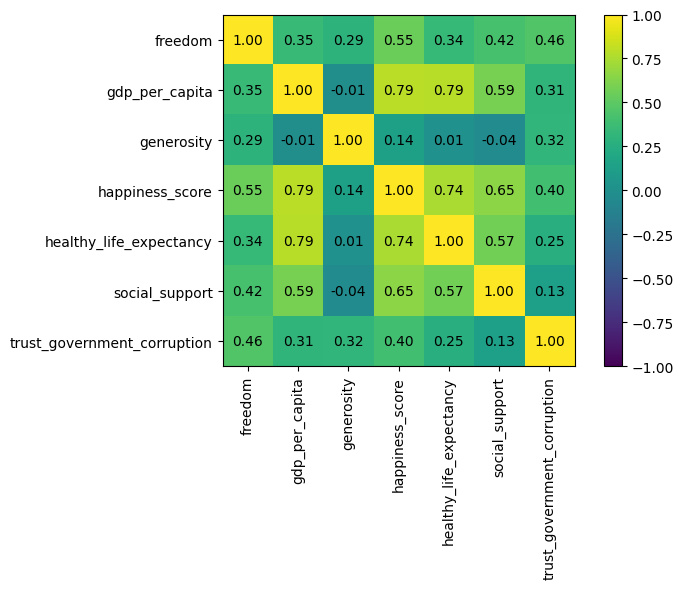

INFO:__main__:Annotated correlation heatmap displayed


In [19]:
corr = numeric.corr()
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr.values, vmin=-1, vmax=1)

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", ha="center", va="center")

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)
fig.colorbar(im)

plt.tight_layout()
plt.show()
logger.info("Annotated correlation heatmap displayed")


__Correlation Heatmap Analysis__

The heatmap highlights key relationships among variables:
- **Happiness Score** has strong positive correlations with **GDP per Capita** (0.79), **Healthy Life Expectancy** (0.74), and **Social Support** (0.65), indicating these factors significantly influence happiness.
- **Generosity** shows weak correlations with most variables, suggesting it has a limited impact on happiness.
- **Trust in Government Corruption** has a moderate positive correlation with **Freedom** (0.46) and **Happiness Score** (0.40), reflecting its importance in societal well-being.

---
### Pairwise Scatter Matrix

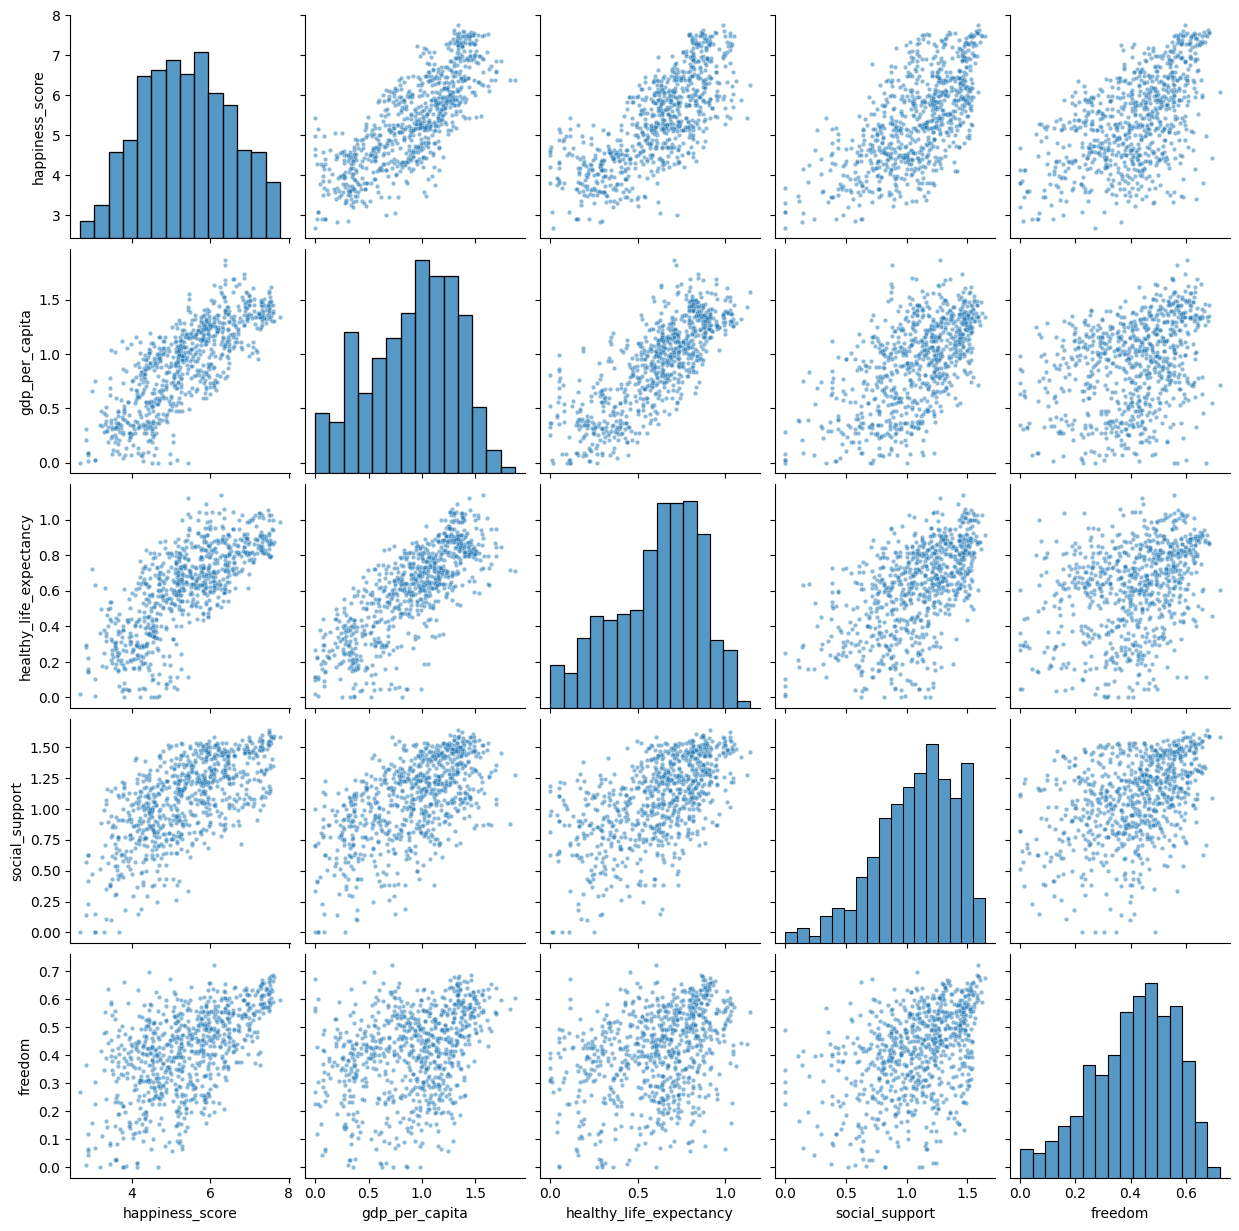

In [20]:
sns.pairplot(
    combined_df,
    vars=['happiness_score','gdp_per_capita','healthy_life_expectancy','social_support','freedom'],
    kind='scatter',
    plot_kws={'s':10, 'alpha':0.5}
)
plt.show()


### Pairwise Relationships of Core Well-Being Metrics

- **GDP per capita vs. happiness_score**: Clear positive linear trend—higher GDP aligns with higher happiness.  
- **healthy_life_expectancy vs. happiness_score**: Strong upward pattern, mirroring the GDP–happiness link.  
- **social_support vs. happiness_score**: Noticeable positive association, though more spread than GDP or health.  
- **freedom vs. happiness_score**: Moderate positive slope, indicating countries with more perceived freedom report greater happiness.  
- **Inter-metric consistency**:

---

### 2. Boxplots to Detect Outliers

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

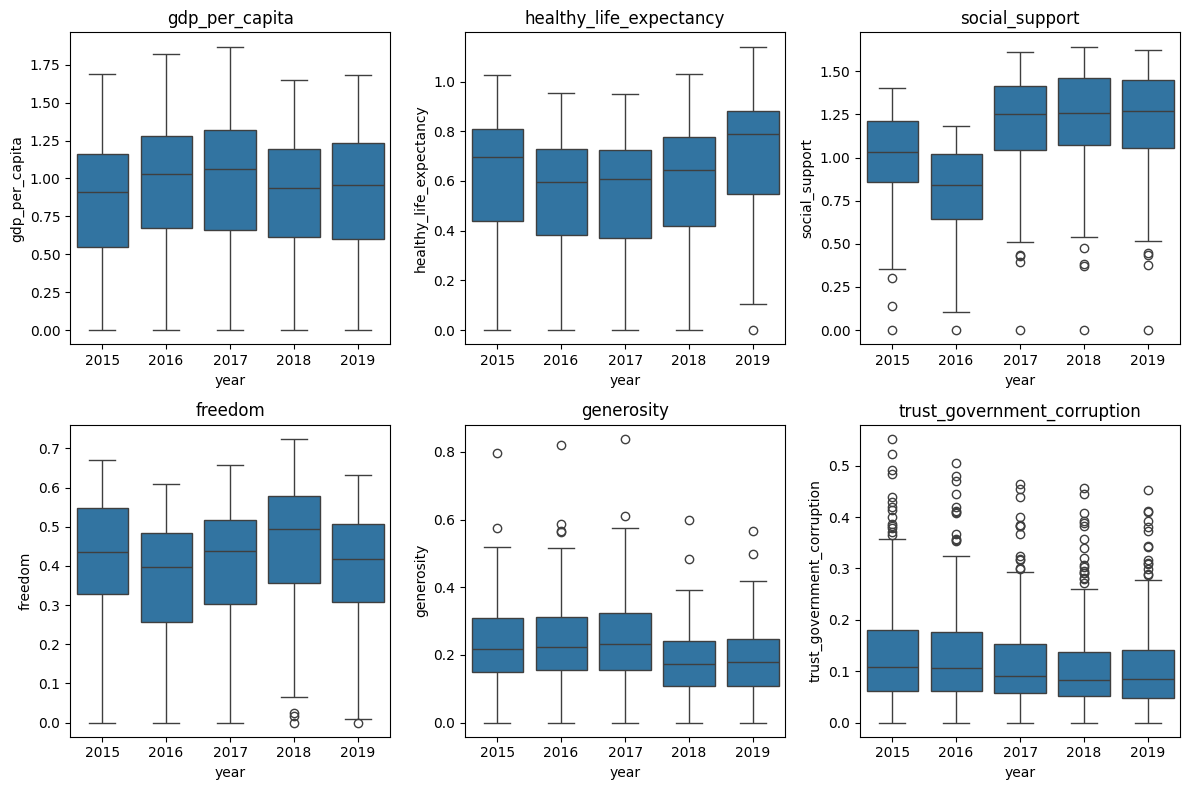

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))
for ax, col in zip(axes.flatten(), ['gdp_per_capita','healthy_life_expectancy','social_support','freedom','generosity','trust_government_corruption']):
    sns.boxplot(x='year', y=col, data=combined_df, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


### Yearly Distribution of Key Metrics via Boxplots

- **GDP per Capita & Life Expectancy**  
  Medians drift upward from 2015 to 2019, indicating steady economic and health improvements across countries.

- **Social Support & Freedom**  
  Both show slight year-to-year gains in central tendency, with consistent spread and occasional low-value outliers.

- **Generosity**  
  Median generosity dips modestly after 2017, and the interquartile range narrows, suggesting fewer very high-generosity cases.

- **Trust in Government**  
  Remains fairly stable over time, with a slight compression of values around lower trust levels and persistent high-value outliers.

**Key takeaway:**  
Economic, health, social and freedom indicators generally improve over the five years, while generosity and corruption trust remain more variable and less upward-trending.  


---

### 3. Time Trends of Average Happiness Score


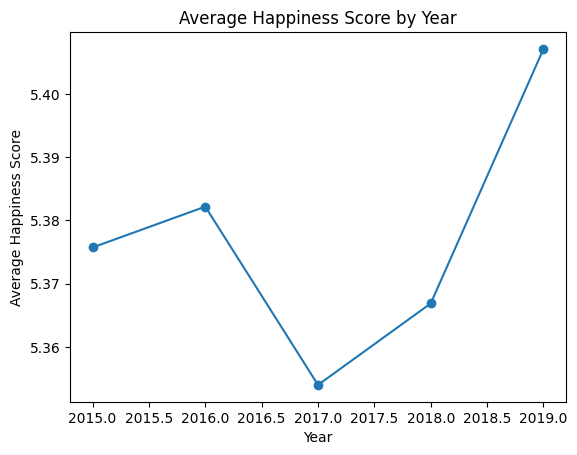

In [22]:
mean_by_year = combined_df.groupby('year')['happiness_score'].mean().reset_index()
plt.plot(mean_by_year['year'], mean_by_year['happiness_score'], marker='o')
plt.title('Average Happiness Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.show()


__Analysis of Average Happiness Score by Year:__
The line plot shows the trend of average happiness scores from 2015 to 2019. While the scores remain relatively stable, there are noticeable fluctuations:

- A slight increase is observed from 2015 to 2016.
- A decline occurs in 2017, reaching the lowest average score in the dataset.
- From 2018 to 2019, there is a significant upward trend, with 2019 having the highest average happiness score.

This suggests a recovery in global happiness levels after the dip in 2017. Further analysis could explore the factors contributing to these changes.

---
### Multicollinearity Check (VIF)
Variance Inflation Factor (VIF) is a measure used to detect multicollinearity in regression analysis. Multicollinearity occurs when two or more independent variables are highly correlated, which can distort the statistical significance of predictors.

In this code, we calculate the VIF for selected features (`gdp_per_capita`, `healthy_life_expectancy`, `social_support`, `freedom`, `generosity`, and `trust_government_corruption`) from the combined dataset. The `dropna()` method ensures that rows with missing values are excluded before computation.

The resulting `vif_data` DataFrame contains two columns:
- `feature`: The name of the feature.
- `VIF`: The Variance Inflation Factor value for the feature.

A VIF value greater than 10 typically indicates high multicollinearity, suggesting that the feature may need to be removed or combined with others to improve model performance.

In [23]:
X = combined_df[['gdp_per_capita','healthy_life_expectancy','social_support','freedom','generosity','trust_government_corruption']].dropna()
vif_data = pd.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
vif_data


,feature,VIF
0,gdp_per_capita,18.284337
1,healthy_life_expectancy,19.358253
2,social_support,16.871811
3,freedom,12.730241
4,generosity,4.295658
5,trust_government_corruption,3.455971


### PCA for Dimensionality Reduction
This scatter plot visualizes the dimensionality reduction of happiness-related features using PCA. Each point represents a country, colored by its happiness score, with brighter colors indicating higher scores. The axes correspond to the first two principal components (PC1 and PC2)

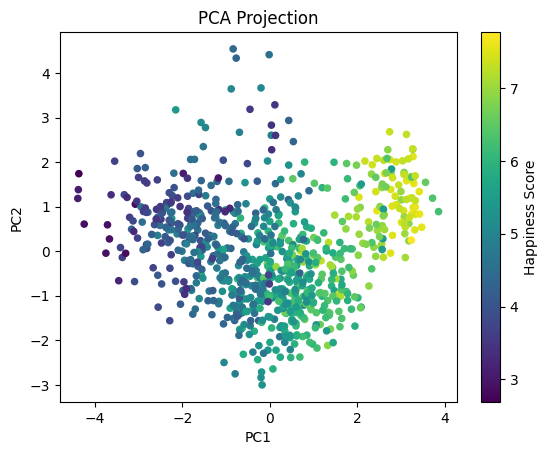

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
plt.scatter(components[:,0], components[:,1], c=combined_df.loc[X.index,'happiness_score'], cmap='viridis', s=20)
plt.colorbar(label='Happiness Score')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()


---

### Preparation for Predictive Modeling: Feature Selection

With the cleaned and merged DataFrame in hand, the next steps focus on selecting the most informative features to predict `happiness_score`. Rather than using every available variable, we will:

- **Identify and retain** only those predictors that demonstrate strong relationships with the target while minimizing redundancy.
- **Transform or encode** any remaining features as needed (scaling, one-hot encoding, interaction terms).  
- **Validate** the impact of each choice through cross-validation, ensuring that the reduced feature set yields better generalization and more stable performance.

**Why this matters:**  
Careful feature selection helps to:
- Reduce model complexity and overfitting  
- Improve interpretability by focusing on key drivers of happiness  
- Enhance predictive accuracy and training efficiency  



---

### Add Continent Classification for Regional Insights

We enrich the dataset by mapping each country to its continent and creating a new `continent` column. This grouping enables:

- **Aggregated analysis**: Compare happiness trends and feature distributions at a regional level.  
- **Categorical modeling**: Incorporate `continent` as a predictor, capturing latent regional effects that individual metrics may miss.  
- **Improved generalization**: By pooling information within continents, the model can better learn patterns where data is sparse for certain countries.

**Conclusion:**  
Including `continent` enhances interpretability and often boosts predictive performance by providing the model with structured geographic context.  


In [ ]:
europe = [
    'Switzerland','Iceland','Denmark','Norway','Finland',
    'Netherlands','Sweden','Austria','Luxembourg','Ireland',
    'Belgium','United Kingdom','France','Germany',
    'Czech Republic','Slovakia','Slovenia','Croatia',
    'Cyprus','North Cyprus','Northern Cyprus','Macedonia',
    'North Macedonia','Montenegro','Kosovo','Serbia',
    'Poland','Lithuania','Latvia','Estonia','Hungary',
    'Romania','Bulgaria','Belarus','Moldova','Ukraine','Russia',
    'Spain','Portugal','Italy','Malta','Greece'
]

america = [
    'Canada','United States','Mexico','Costa Rica','Panama',
    'Colombia','Venezuela','Ecuador','Peru','Bolivia','Chile',
    'Brazil','Argentina','Uruguay','Paraguay','Suriname',
    'Trinidad and Tobago','Trinidad & Tobago','Belize','Guatemala',
    'Honduras','El Salvador','Nicaragua','Jamaica','Haiti',
    'Dominican Republic','Puerto Rico'
]

asia = [
    'Israel','United Arab Emirates','Oman','Qatar','Saudi Arabia',
    'Kuwait','Bahrain','Turkey','Kazakhstan','Uzbekistan',
    'Kyrgyzstan','Turkmenistan','Azerbaijan','Armenia','Georgia',
    'India','Pakistan','Bangladesh','Nepal','Sri Lanka','Bhutan',
    'Afghanistan','China','Hong Kong','Hong Kong S.A.R., China',
    'Taiwan','Taiwan Province of China','Japan','South Korea',
    'Singapore','Malaysia','Thailand','Philippines','Indonesia',
    'Vietnam','Cambodia','Laos','Myanmar','Iraq','Iran','Syria',
    'Lebanon','Jordan','Palestinian Territories'
]

africa = [
    'Algeria','Libya','Morocco','Tunisia','Egypt','Sudan',
    'South Sudan','Mauritania','Mali','Niger','Chad',
    'Central African Republic','Burkina Faso','Ivory Coast',
    'Ghana','Togo','Benin','Nigeria','Cameroon','Gabon',
    'Congo (Brazzaville)','Congo (Kinshasa)','Angola','Zambia',
    'Zimbabwe','Mozambique','Madagascar','Tanzania','Kenya',
    'Uganda','Rwanda','Burundi','Ethiopia','Somalia',
    'Somaliland region','Somaliland Region','Lesotho','Swaziland',
    'South Africa','Djibouti','Comoros','Mauritius','Namibia',
    'Senegal','Sierra Leone','Guinea','Liberia'
]

oceania = [
    'Australia','New Zealand'
]

continent_map = {c: 'Europe' for c in europe}
continent_map.update({c: 'America' for c in america})
continent_map.update({c: 'Asia' for c in asia})
continent_map.update({c: 'Africa' for c in africa})
continent_map.update({c: 'Oceania' for c in oceania})

combined_df['continent'] = combined_df['country'].map(continent_map).fillna('Other')

### Create Interaction Feature: GDP × Social Support

To capture the synergistic effect of economic wealth and social cohesion, we define a new variable:



In [26]:
combined_df['gdp_support'] = combined_df['gdp_per_capita'] * combined_df['social_support']

---
### Head for final combined_df

In [28]:
combined_df.head()

,country,freedom,gdp_per_capita,generosity,happiness_rank,happiness_score,healthy_life_expectancy,social_support,trust_government_corruption,year,continent,gdp_support
0,Switzerland,0.66557,1.39651,0.29678,1,7.587,0.94143,1.34951,0.41978,2015,Europe,1.884604
1,Iceland,0.62877,1.30232,0.43630,2,7.561,0.94784,1.40223,0.14145,2015,Europe,1.826152
2,Denmark,0.64938,1.32548,0.34139,3,7.527,0.87464,1.36058,0.48357,2015,Europe,1.803422
3,Norway,0.66973,1.45900,0.34699,4,7.522,0.88521,1.33095,0.36503,2015,Europe,1.941856
4,Canada,0.63297,1.32629,0.45811,5,7.427,0.90563,1.32261,0.32957,2015,America,1.754164


### Save Combined DataFrame to CSV

In [27]:
combined_df.to_csv('data/combined_happiness.csv', index=False)
logger.info('Saved combined_df to data/combined_happiness.csv')

INFO:__main__:Saved combined_df to data/combined_happiness.csv
